## ANOVA

Односторонний **ANOVA** (“дисперсионный анализ”) сравнивает средние значения трех или более независимых групп, чтобы определить, существует ли статистически значимая разница между соответствующими средними значениями совокупности.

В нашем случае мы будем сравнивать пингвинов Адели, живущих на разных островах в Южном полушарии, чтобы получить ответ на вопрос: **влияют ли факторы внешней среды (обитание на разных островах) на онтогенез пингвинов Адели или же зарегистрированные различия между ними обусловлены случайными причинами?**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_peng = pd.read_csv('C:\\Users\\db2001\\Desktop\\Статистика\\B_stat\\DF\\penguins_size.csv', sep = ',')
df_peng.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Exploratory data analysis

Проведем разведочный анализ по следующим пунктам:

Визуализация основных характеристик датафрейма.
   -  1.0. Очистка данных от NaN;
   -  1.1. Посмотрим основные типы данных;
   -  1.2. Посмотрим количество пингвинов по виду;
   -  1.3. Посмотрим количество пингвинов по полу;
   -  1.4. Посмотрим распределение пингвинов по территории;
   -  1.5. Посмотрим распределение пингвинов по характеристикам.

### Визуализация основных характеристик датафрейма

##### Очистка данных от пустых значений и просмотр основных типов данных

К сожалению, далеко не каждый набор данных представляет собой идеальный набор значений, без выбросов, ассиметрии и пропущенных значений. В "настоящих" данных порой царит беспорядок, поэтому прежде чем приступить к анализу, их нужно очистить и привести к приемлемому формату.

Что касается, просмотра основного типа данных, то их анализ поможет нам выбрать наиболее адекватные для данного датафрейма методы визуализации. 

Приступим, начав с поиска и очистки данных от пустых значений и некорретных значений.

In [3]:
df_peng.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [4]:
df_peng[df_peng.isnull().any(axis = 1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


Т.к. строки 3 и 339 не содержат толком никакой информации, их мы удалим. Проставлять рандомно медианные значения в зависимости от вида, острова и пола пингвина в данном случае бессмысленно, т.к. какие-либо данные по весу и клюву напрочь отсутствуют.

С остальными строками мы поработаем, подобрав наиболее адекватное значение в колонке "Пол".

In [5]:
df_peng['sex'].fillna(df_peng['sex'].mode()[0], inplace = True)
df_p = df_peng.dropna(how = 'any')
df_p[df_p.isnull().any(axis = 1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


Пустых строк в таблице не осталось, зато выяснилось, что в столбец "Пол" затесалось некорректное значение. Его мы выявим командой loc, а затем заменим нужным нам значением.

In [6]:
df_p.sex.value_counts()

MALE      176
FEMALE    165
.           1
Name: sex, dtype: int64

In [7]:
df_p.loc[df_p['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [8]:
df_p.loc[336, 'sex'] = 'FEMALE'
df_p.loc[336]

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                  FEMALE
Name: 336, dtype: object

Посмотрим основные типы данных нашего датафрейма

In [9]:
print(df_p.dtypes)

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


#### Визуализация пингвинов

1. По количеству
2. По островам
3. По полу
4. По характеристикам

Прежде чем рисовать графики с количеством исследованных пингвинов, найдем их процентное соотношение

In [10]:
df_is = df_p.groupby(['species']).size().reset_index(name="Quant")
a = df_is["Quant"].sum()
df_is['%'] = (df_is["Quant"].div(a))*100
df_is.head(12)

,species,Quant,%
0,Adelie,151,44.152047
1,Chinstrap,68,19.883041
2,Gentoo,123,35.964912


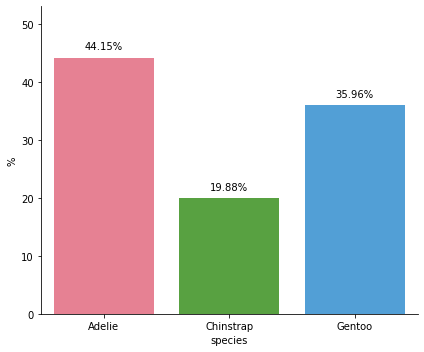

In [130]:
fg = sns.catplot(x='species', y = '%',
            data=df_is, kind = 'bar',
            height=5, aspect=1.2, 
            palette=sns.color_palette('husl', 3))

for ax in fg.axes.ravel():
    for c in ax.containers:
        labels = [f'{w:0.2f}%' if (w := v.get_height()) > 0 else '' for v in c]

        ax.bar_label(c, labels=labels, label_type='edge', fontsize=10, padding=6)
    
    ax.margins(y=0.2)

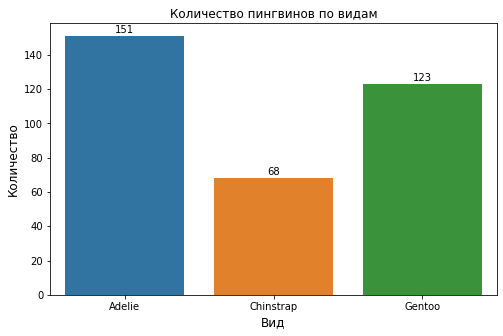

In [303]:
countplt, ax = plt.subplots(figsize = (8,5))
sns.countplot(x = 'species', data  = df_p)
ax.set_title('Количество пингвинов по видам',fontsize = 12)
ax.set_xlabel('Вид', fontsize = 12)
ax.set_ylabel('Количество', fontsize = 12)
for col in ax.patches:
    ax.text(col.get_x() + col.get_width()/2,
             col.get_height()+2,
             col.get_height(),
             horizontalalignment='center',
             fontsize = 10)

Выборки пингвинов очевидно имеют различные размеры. Это может повлиять на результат нашего дисперсионного анализа, т.к. различные размеры выборок ведут:

- Уменьшению статистической мощности используемого статистического критерия;
- Увеличению неоднородности выборок.

**Уменьшение статистической мощности** снижает нашу способность найти и измерить различия, если они существуют. Чем больше различий в размере выборок, тем ниже будет точность используемого статистического критерия.

Что касается **увеличения неоднородности**, то, к примеру, t-test и ANOVA в основе своей имеют требования к однородности отклонений выборок. Если по результатам тестов Левена или Бартлетта обнаружится неоднородность, то придется применять иной статистический критерий (например, критерий Краскела — Уоллиса)

In [13]:
def bars(var):
    Adelie = df_p[df_p['species'] == 'Adelie'][var].value_counts()
    Gentoo = df_p[df_p['species'] == 'Gentoo'][var].value_counts()
    Chinstrap = df_p[df_p['species'] == 'Chinstrap'][var].value_counts()

    df_island = pd.DataFrame([Adelie, Gentoo, Chinstrap])
    df_island.index = ['Adelie', 'Gentoo', 'Chinstrap']
    df_island.plot.barh(stacked=True)

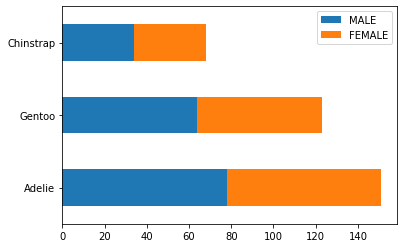

In [14]:
bars('sex')

В целом можно сказать, что по полу наши пингвины распределены равномерно.

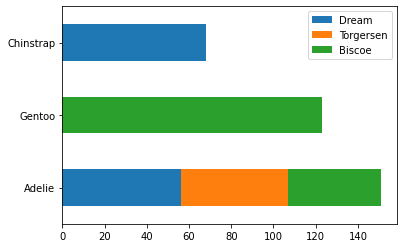

In [15]:
bars('island')

А вот насчет островов можно сказать, что пингвины Адели распространены более широко, чем Генту и Антарктический пингвин. Однако делать выводы о популяции на основании этих данных не стоит: наиболее широкое распространение и количество особей имеет антарктический пингвин (около 8 миллионов особей). За ним следует Адели (4,74 млн.особей) и уже потом Генту (около 600 тыс. особей). Так что такое соотношение пингвинов, видимо, приходится на острова, где работали исследователи. 

Посмотрим, как распределились характеристики пингвинов. Построим "ящики с усами", чтобы предварительно оценить нормальность распределения, размах выборок, вариативность данных, выбросы и медианные значения.

Text(0.5, 1.0, 'Сulmen depth, mm')

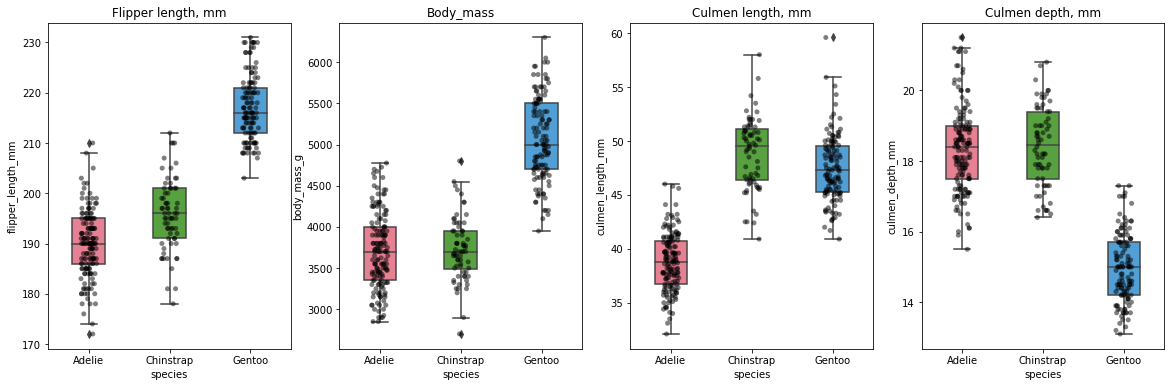

In [16]:
fig, axes = plt.subplots(1,4, figsize=(20, 6))

# Длина плавника
sns.boxplot(data = df_p,
            x = 'species',
            y = 'flipper_length_mm',
            ax = axes[0],
            palette = 'husl',
            width=0.4)
sns.stripplot(data = df_p, 
                        x= "species",
                        y = "flipper_length_mm",
                        ax = axes[0],
                        marker="o",
                        alpha=0.5,
                        color="black")
axes[0].set_title("Flipper length, mm",fontsize=12)


# Вес
sns.boxplot(data = df_p,
            x = 'species',
            y = 'body_mass_g',
            ax = axes[1],
            palette = 'husl',
            width=0.4)
sns.stripplot(data = df_p, 
                        x= "species",
                        y = "body_mass_g",
                        ax = axes[1],
                        marker="o",
                        alpha=0.5,
                        color="black")
axes[1].set_title("Body_mass",fontsize=12)


#Длина клюва
sns.boxplot(data = df_p,
            x = 'species',
            y = 'culmen_length_mm',
            ax = axes[2],
            palette = 'husl',
            width=0.4)
sns.stripplot(data = df_p, 
                        x= "species",
                        y = "culmen_length_mm",
                        ax = axes[2],
                        marker="o",
                        alpha=0.5,
                        color="black")
axes[2].set_title("Сulmen length, mm",fontsize=12)

#Толщина клюва
sns.boxplot(data = df_p,
            x = 'species',
            y = 'culmen_depth_mm',
            ax = axes[3],
            palette = 'husl',
            width=0.4)
sns.stripplot(data = df_p, 
                        x= "species",
                        y = "culmen_depth_mm",
                        ax = axes[3],
                        marker="o",
                        alpha=0.5,
                        color="black")
axes[3].set_title("Сulmen depth, mm",fontsize=12)


Из графиков видно, что распределение скорее нормально, чем ассиметрично. Безусловно более точный ответ нам дадут графики Q-Q plot и критерий Шапиро-Уилка. 

В глаза бросается, что Адели и Антарктический пингвин очень похожи по массе тела, длине плавников и толщине клюва. Единственное их различие - это длина ключа, которая у Адели гораздо меньше. 

Также обращает на себя внимание то, как распределены значения у Адели и Генту: они равномерно заполняют все "усы". Возможно, в такое распределение большой вклад вносит пол пингвина, который мы не учитывали. 

Это мы и проверим.

Text(0.5, 1.0, 'Body_mass, Chinsrap')

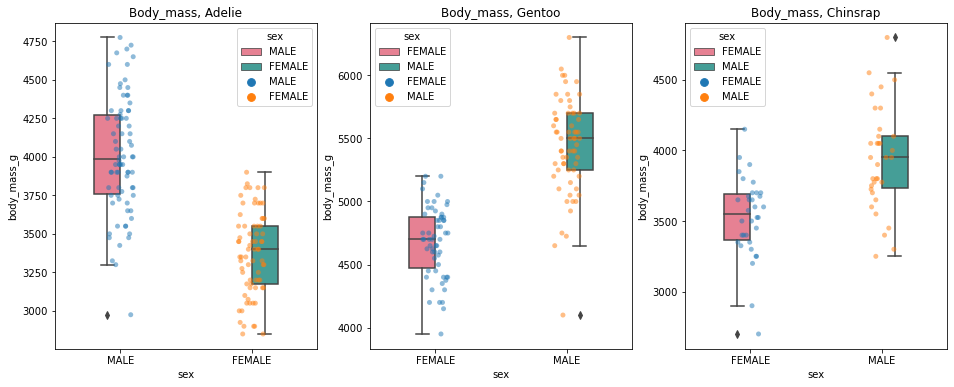

In [41]:
Adelie = df_p.query('species == "Adelie"')[{'body_mass_g', 'culmen_length_mm', 'flipper_length_mm', 'sex', 'island', 'culmen_depth_mm'}]
Gentoo = df_p.query('species == "Gentoo"')[{'body_mass_g', 'culmen_length_mm', 'flipper_length_mm', 'sex', 'island', 'culmen_depth_mm'}]
Chinsrap = df_p.query('species == "Chinstrap"')[{'body_mass_g', 'culmen_length_mm', 'flipper_length_mm', 'sex', 'island', 'culmen_depth_mm'}]

fig, axes = plt.subplots(1,3, figsize=(16, 6))
sns.boxplot(data = Adelie,
            x = 'sex',
            y = 'body_mass_g',
            ax = axes[0],
            palette = 'husl',
            hue = 'sex',
            width=0.4)
sns.stripplot(data = Adelie, 
                        x= "sex",
                        y = "body_mass_g",
                        ax = axes[0],
                        marker="o",
                        hue = 'sex',
                        alpha=0.5,
                        edgecolor=sns.color_palette("hls", 2))
axes[0].set_title("Body_mass, Adelie",fontsize=12)

sns.boxplot(data = Gentoo,
            x = 'sex',
            y = 'body_mass_g',
            ax = axes[1],
            palette = 'husl',
            hue = 'sex',
            width=0.4)
sns.stripplot(data = Gentoo, 
                        x= "sex",
                        y = "body_mass_g",
                        ax = axes[1],
                        marker="o",
                        hue = 'sex',
                        alpha=0.5,
                        edgecolor=sns.color_palette("hls", 2))
axes[1].set_title("Body_mass, Gentoo",fontsize=12)


sns.boxplot(data = Chinsrap,
            x = 'sex',
            y = 'body_mass_g',
            ax = axes[2],
            palette = 'husl',
            hue = 'sex',
            width=0.4)
sns.stripplot(data = Chinsrap, 
                        x= "sex",
                        y = "body_mass_g",
                        ax = axes[2],
                        marker="o",
                        hue = 'sex',
                        alpha=0.5,
                        edgecolor=sns.color_palette("hls", 2))
axes[2].set_title("Body_mass, Chinsrap",fontsize=12)

Text(0.5, 1.0, 'Flipper length, Chinsrap')

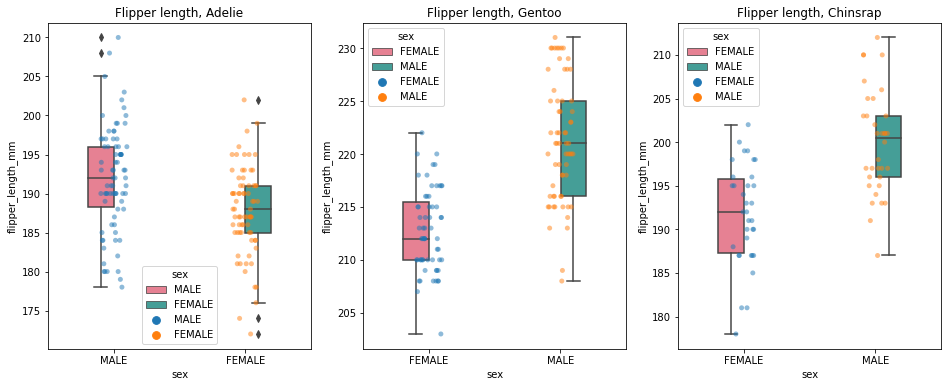

In [18]:
fig, axes = plt.subplots(1,3, figsize=(16, 6))
sns.boxplot(data = Adelie,
            x = 'sex',
            y = 'flipper_length_mm',
            ax = axes[0],
            palette = 'husl',
            hue = 'sex',
            width=0.4)
sns.stripplot(data = Adelie, 
                        x= "sex",
                        y = "flipper_length_mm",
                        ax = axes[0],
                        marker="o",
                        hue = 'sex',
                        alpha=0.5,
                        edgecolor=sns.color_palette("hls", 2))
axes[0].set_title("Flipper length, Adelie",fontsize=12)

sns.boxplot(data = Gentoo,
            x = 'sex',
            y = 'flipper_length_mm',
            ax = axes[1],
            palette = 'husl',
            hue = 'sex',
            width=0.4)
sns.stripplot(data = Gentoo, 
                        x= "sex",
                        y = "flipper_length_mm",
                        ax = axes[1],
                        marker="o",
                        hue = 'sex',
                        alpha=0.5,
                        edgecolor=sns.color_palette("hls", 2))
axes[1].set_title("Flipper length, Gentoo",fontsize=12)


sns.boxplot(data = Chinsrap,
            x = 'sex',
            y = 'flipper_length_mm',
            ax = axes[2],
            palette = 'husl',
            hue = 'sex',
            width=0.4)
sns.stripplot(data = Chinsrap, 
                        x= "sex",
                        y = "flipper_length_mm",
                        ax = axes[2],
                        marker="o",
                        hue = 'sex',
                        alpha=0.5,
                        edgecolor=sns.color_palette("hls", 2))
axes[2].set_title("Flipper length, Chinsrap",fontsize=12)

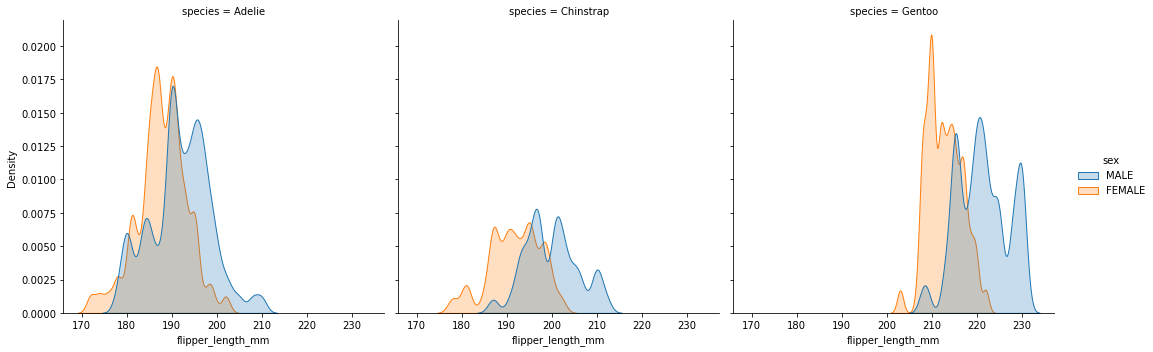

In [19]:
sns.displot(x="flipper_length_mm",
            col="species",
            hue='sex',
            kind="kde",
            bw_adjust=0.4,
            data=df_p,
            fill=True);

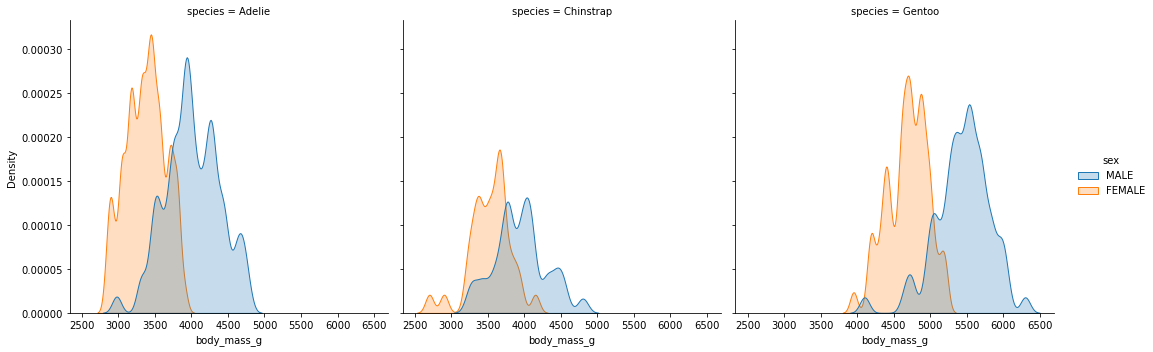

In [20]:
sns.displot(x="body_mass_g",
            col="species",
            hue='sex',
            kind="kde",
            bw_adjust=0.4,
            data=df_p,
            fill=True);                                                          

Сравнивая пингвинов по половой принадлежности можно сделать **следующие выводы**:

- Самцы весят больше самок. Особенно это заметно у Генту и Адели. Антарктический пингвин такой существенной разницы в весе между самками и самцами не имеет.
- По длине плавников у Генту вновь идет четкая градация по половому признаку. Что интересно, у Адели, где с весом картина была похожа на Генту, мы подобной картины не наблюдаем: плавники различаются, но не существенно. А у Антарктического пингвина наоборот - при небольшой разнице в весе существенная разница в длине плавников.
- Графики плотности ядра показывают несколько пиков, что, возможно, свидетельствует о том, что исследовались еще и **разные по возрасту пингвины**. 
- Возможно, имеет смысл **категоризировать** пингвинов не только по виду и полу, но и **по фенотипу**. Касаемо Адели, то ввиду того, что они распространены на 3-х островах, помимо категоризации по фенотипу имеет смысл оценить влияют ли географические особенности на их онтогенез.

Безусловно, это лишь первичная визуальная оценка. Более точные данные можно получить, проведя полноценное исследование, используя адекватные статистические критерии.

Напоследок изучим наши данные, используя метод describe, благодаря которому мы сможем оценить меры центральной тенденции и меры разброса наших выборок. 

In [21]:
df_p.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [24]:
df_p.query('species == "Adelie" & sex == "MALE"').describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,78.000000,78.000000,78.000000,78.000000
mean,40.226923,19.024359,191.974359,4011.217949
std,2.377365,1.043494,6.743875,373.767399
min,34.100000,17.000000,178.000000,2975.000000
25%,38.650000,18.400000,188.250000,3756.250000
50%,40.600000,18.900000,192.000000,3987.500000
75%,41.500000,19.575000,196.000000,4268.750000
max,46.000000,21.500000,210.000000,4775.000000


## Корреляционный анализ

Изучим тесноту и направление взаимосвязи некоторых наших переменных. Возможно, благодаря корреляционному анализу мы найдем некоторые неочевидные причинные связи, а также отберем факторы, оказывающие наиболее существенное влияние на выбранный нами результативный признак.

Для начала обозначим "силу" взаимосвязей:

- 0.1 - 0.3  Слабая взаимосвязь
- 0.3 - 0.5 - Умеренная взаимосвязь
- 0.5 - 0.7 - Заметная взаимосвязь
- 0.7 - 0.9 - Высокая взаимосвязь
- 0.9 - 1 - Весьма высокая взаимосвязь

И визуализируем нашу таблицу на тепловой карте.

<AxesSubplot:>

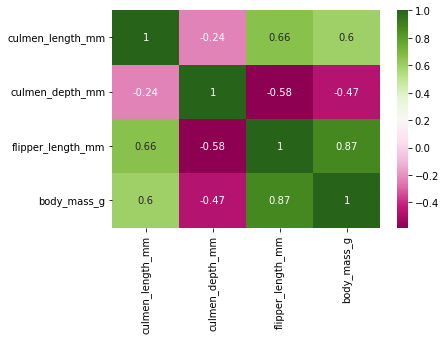

In [40]:
sns.heatmap(df_p.corr(), cmap="PiYG", annot = True)

In [59]:
df_p.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


Посмотрим тесноту взаимосвязи веса пингвинов и других их частей тела:
- Длина плавника
- Длина клюва
- Толщина клюва

(0.0, 6480.0)

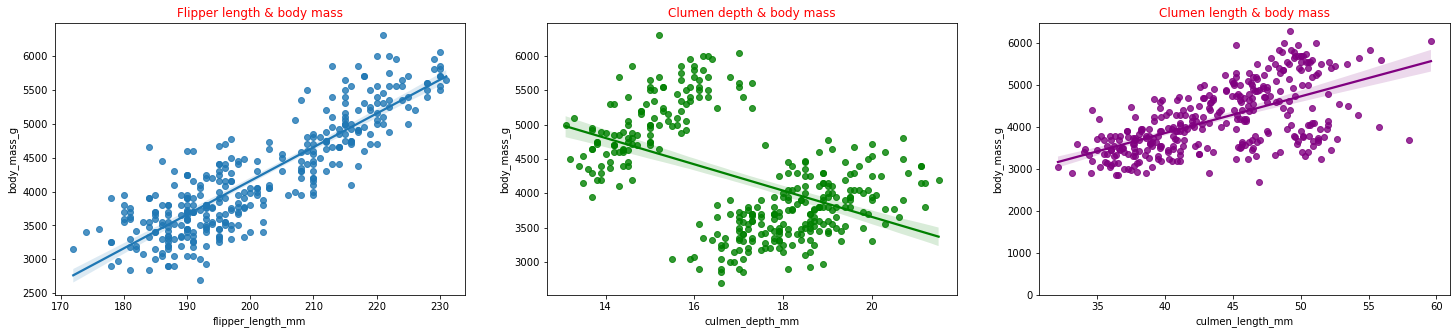

In [57]:
fig, axes = plt.subplots(1,3,figsize=(25,5))
axes[0].set_title("Flipper length & body mass",fontsize=12,color='Red')
sns.regplot(x="flipper_length_mm", y="body_mass_g", data=df_p, ax=axes[0])
axes[1].set_title("Culmen depth & body mass",fontsize=12,color='Red')
sns.regplot(x="culmen_depth_mm", y="body_mass_g", data=df_p, ax=axes[1], color = 'green')
axes[2].set_title("Clumen length & body mass",fontsize=12,color='Red')
sns.regplot(x="culmen_length_mm", y="body_mass_g", data=df_p, ax=axes[2], color = 'purple')
plt.ylim(0,)

In [58]:
df_p[["flipper_length_mm", "body_mass_g"]].corr()

,flipper_length_mm,body_mass_g
flipper_length_mm,1.000000,0.871202
body_mass_g,0.871202,1.000000


In [20]:
df_p[["culmen_depth_mm", "body_mass_g"]].corr()

,culmen_depth_mm,body_mass_g
culmen_depth_mm,1.000000,-0.471916
body_mass_g,-0.471916,1.000000


In [60]:
df_p[["culmen_length_mm", "body_mass_g"]].corr()

,culmen_length_mm,body_mass_g
culmen_length_mm,1.00000,0.59511
body_mass_g,0.59511,1.00000


Прослеживается **высокая положительная взаимосвязь** между длиной плавника и весом пингвина. **Заметную положительную взаимосвязь** можно обнаружить между длиной клюва и весом. Т.о., по длине плавника и по длине клюва теоретически можно предсказать вес пингвина. 

Умеренная отрицательная взаимосвязь наблюдается между толщиной клюва и весом пингвина. При этом на точечном графике видно четкое разделение наблюдений на 2 группы в зависимости от веса пингвина. Условно говоря, у нас есть "толстые" пингвины с тонким клювом (Генту) и менее массивные виды, но с толстым клювом (Адели и Антарктический пингвин). 

Однако здесь мы рассматривали всех наших птиц, что может дать не совсем корректные результаты, ведь мы знаем, что у нас 3 вида пингвинов и у них разная морфология.

<AxesSubplot:title={'center':'Chinsrap'}>

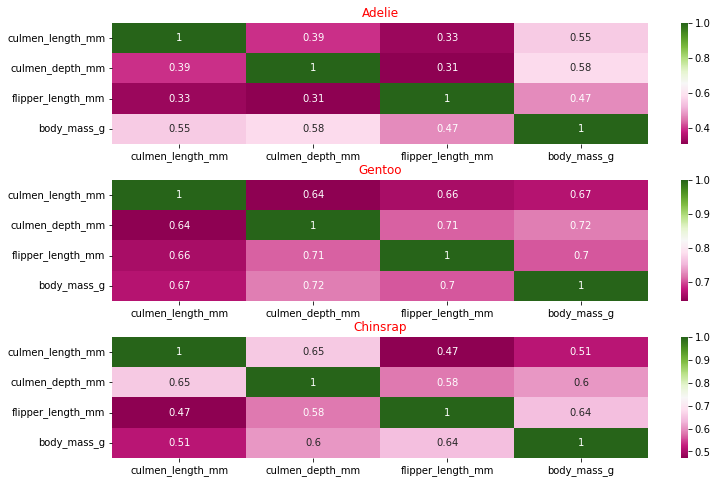

In [131]:
fg, axes = plt.subplots(3,1, figsize=(12, 8))
fg.subplots_adjust(hspace = .3)
axes[0].set_title("Adelie",fontsize=12,color='Red')
sns.heatmap(df_p.query('species == "Adelie"').corr(),
            cmap="PiYG",
            annot = True,
            ax = axes[0]) 

axes[1].set_title("Gentoo",fontsize=12,color='Red')
sns.heatmap(df_p.query('species == "Gentoo"').corr(),
            cmap="PiYG",
            annot = True,
            ax = axes[1]) 

axes[2].set_title("Chinsrap",fontsize=12,color='Red')
sns.heatmap(df_p.query('species == "Chinstrap"').corr(),
            cmap="PiYG",
            annot = True,
            ax = axes[2]) 

Корреляционный анализ в разрезе каждого вида, очевидно, дал не столь однозначные результаты:

- В случае с **Адели** вес и длина плавника уже имеют умеренную взаимосвязь. У **Генту** же эта взаимосвязь остается сильной. А у **Антарктического пингвина** - заметной.
- В целом, все морфологические параметры **Адели** имеют не такую сильную взаимосвязь друг с другом, как у **Генту** или **Антарктического пингвина**.

В принципе, можно проверить является корреляция между каким-либо параметрами статистически значимой. Для этого возьмем вес нашего Адели и сравним его с длиной и толщиной клюва, а также с длиной плавника. Нулевой гипотезой у нас будет то, что ни толщина клюва, ни плавник, ни длина клюва не оказывают никакого влияния на вес пингвина. Уровень значимости возьмем: α = 0.05.

In [71]:
from scipy import stats

pearson_f, p_value = stats.pearsonr(Adelie['body_mass_g'], Adelie['flipper_length_mm'])
print("Сила взаимосвязи между весом пингивна и длиной его плавника равна - ", pearson_f, ". Уровень значимости =", p_value)  

Сила взаимосвязи между весом пингивна и длиной его плавника равна -  0.46820169421793933 . Уровень значимости = 1.3432645947790004e-09


In [74]:
pearson_c, p_value = stats.pearsonr(Adelie['body_mass_g'], Adelie['culmen_depth_mm'])
print("Сила взаимосвязи между весом пингивна и толщиной его клюва равна - ", pearson_c, ". Уровень значимости =", p_value)

Сила взаимосвязи между весом пингивна и толщиной его ключа равна -  0.5761381672934052 . Уровень значимости = 9.941851194331546e-15


In [75]:
pearson_l, p_value = stats.pearsonr(Adelie['body_mass_g'], Adelie['culmen_length_mm'])
print("Сила взаимосвязи между весом пингивна и длиной его клюва равна - ", pearson_l, ". Уровень значимости =", p_value)

Сила взаимосвязи между весом пингивна и длиной его клюва равна -  0.5488658064533205 . Уровень значимости = 2.9547579193017116e-13


Как мы видим, p-value < 0.05. Это значит, что, даже несмотря на не столько сильную связь между наблюдаемыми параметрами, полученные нами **результаты статистически значимы**, и мы можем отбросить нулевую гипотезу.

Также, давайте посмотрим, на результаты корреляционного анализа в разрезе пола и островов обитания наших Адели.

<AxesSubplot:title={'center':'Adelie, MALE'}>

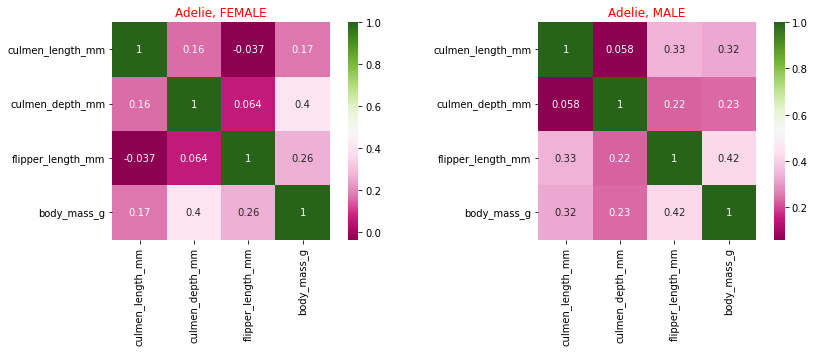

In [132]:
fg, axes = plt.subplots(1,2, figsize=(14, 4))
axes[0].set_title("Adelie, FEMALE",fontsize=12,color='Red')
sns.heatmap(df_p.query('species == "Adelie" & sex == "FEMALE"').corr(),
            cmap="PiYG",
            annot = True,
            ax = axes[0],
            square=True) 

axes[1].set_title("Adelie, MALE",fontsize=12,color='Red')
sns.heatmap(df_p.query('species == "Adelie" & sex == "MALE"').corr(),
            cmap="PiYG",
            annot = True,
            ax = axes[1], 
            square=True) 

In [124]:
pearson_l1, p_value = stats.pearsonr(df_p.query('species == "Adelie" & sex == "FEMALE"')['body_mass_g'],
                                     df_p.query('species == "Adelie" & sex == "FEMALE"')['culmen_depth_mm'])
print("Сила взаимосвязи между весом самки пингивна и тощиной её клюва равна - ", pearson_l1, ". Уровень значимости =", p_value)

Сила взаимосвязи между весом самки пингивна и тощиной её клюва равна -  0.39693747599649865 . Уровень значимости = 0.0005072290253932691


In [125]:
pearson_l2, p_value = stats.pearsonr(df_p.query('species == "Adelie" & sex == "MALE"')['body_mass_g'],
                                     df_p.query('species == "Adelie" & sex == "MALE"')['flipper_length_mm'])
print("Сила взаимосвязи между весом самца пингивна и длиной плавника равна - ", pearson_l2, ". Уровень значимости =", p_value)

Сила взаимосвязи между весом самца пингивна и длиной плавника равна -  0.41641873752758846 . Уровень значимости = 0.00014937749709860755


Интересно наблюдать, что у самок Адели прослеживается умеренная взаимосвязь между весом тела и толщиной клюва (наблюдения статистически значимы). А у самцов она почти в 2 раза слабее. При этом у самцов почти в 1,5 раза сильнее связь между весом тела и длиной плавников (наблюдения также статистически значимы). И прослеживается умеренная взаимосвязь между длиной и толщиной клюва и длиной плавников. У самок же такой связи и вовсе нет.

<AxesSubplot:title={'center':'Adelie, Dream'}>

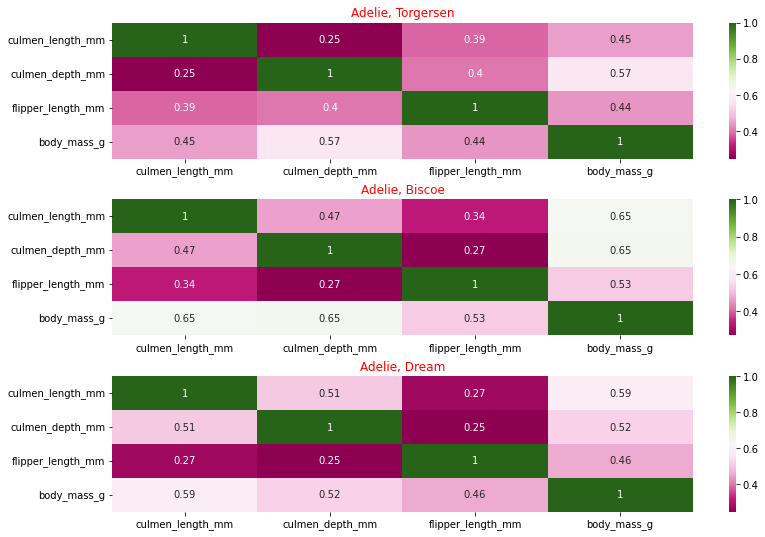

In [133]:
fg, axes = plt.subplots(3,1, figsize=(13, 9))
fg.subplots_adjust(hspace = .3)
axes[0].set_title("Adelie, Torgersen",fontsize=12,color='Red')
sns.heatmap(df_p.query('species == "Adelie" & island == "Torgersen"').corr(),
            cmap="PiYG",
            annot = True,
            ax = axes[0]) 

axes[1].set_title("Adelie, Biscoe",fontsize=12,color='Red')
sns.heatmap(df_p.query('species == "Adelie" & island == "Biscoe"').corr(),
            cmap="PiYG",
            annot = True,
            ax = axes[1]) 

axes[2].set_title("Adelie, Dream",fontsize=12,color='Red')
sns.heatmap(df_p.query('species == "Adelie" & island == "Dream"').corr(),
            cmap="PiYG",
            annot = True,
            ax = axes[2]) 

In [126]:
pearson_l1, p_value = stats.pearsonr(df_p.query('species == "Adelie" & island == "Biscoe"')['body_mass_g'],
                                     df_p.query('species == "Adelie" & island == "Biscoe"')['culmen_depth_mm'])
print("Сила взаимосвязи между весом пингивна и толщиной его клюва равна - ", pearson_l1, ". Уровень значимости =", p_value)

Сила взаимосвязи между весом пингивна и тощиной его клюва равна -  0.6516595288463412 . Уровень значимости = 1.658109078894436e-06


Результат корреляционного анализа пингвинов Адели в разрезе островов сподвигает нас провести дисперсионный их анализ, т.к. по его результатам наблюдаются различия в силе взаимосвязей исследуемых параметров. Немного выбивается из общей картины остров Torgersen. Возможно, разная теснота обусловлена полом пингивнов. Т.е., на каком-то острове больше самок, чем самцов. Проверим.

In [280]:
Ade = df_p.query('species == "Adelie"')[{'sex', 'island'}].value_counts()
Ade.head(10)

# Adem = Ade[Ade['sex'] == 'MALE'].value_counts()
# Adef = Ade[Ade['sex'] == 'FEMALE'].value_counts()

# df_island_s = pd.DataFrame([Adem, Adef])
# df_island_s.index = ['Male', 'Female']
# df_island_s.plot.bar(figsize=[11, 4])

sex     island   
MALE    Dream        29
FEMALE  Dream        27
MALE    Torgersen    27
FEMALE  Torgersen    24
        Biscoe       22
MALE    Biscoe       22
dtype: int64

## ANOVA

Итак, попробуем определить влияют ли факторы внешней среды (обитание на разных островах) на онтогенез пингвинов Адели или же зарегистрированные различия между ними обусловлены случайными причинами?

Для начала:

- Выделим в отдельный фрейм пингвинов Адели мужского пола;
- Выделим в отдельный фрейм пингвинов Адели женского пола;
- Проверим наши выборки на нормальность распределения (Шапиро-Уилк); 
- Проверим выборки на однородность дисперсии (критерий Бартлетта);
- Определим значимость внешней среды на морфологию пингвинов.

In [284]:
df_ad_m = df_p.query('species == "Adelie" & sex == "MALE"')
df_ad_f = df_p.query('species == "Adelie" & sex == "FEMALE"')

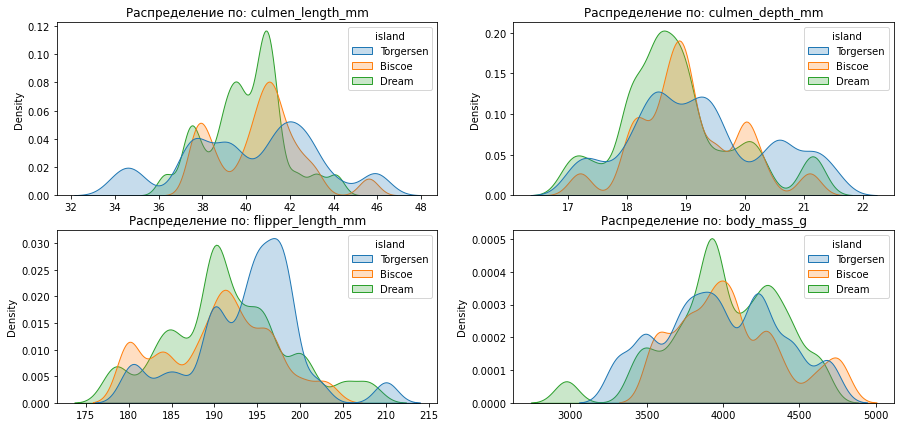

In [285]:
fig, axes = plt.subplots(2, 2, figsize=(15, 7))
axes = axes.ravel()  
cols = df_ad_m.columns[2:6]  

for col, ax in zip(cols, axes):
    data = df_ad_m[[col, 'island']]  
    sns.kdeplot(data=data, x=col, hue='island', shade=True, bw_adjust=0.4, ax=ax)
    ax.set(title=f'Распределение по: {col}', xlabel=None)
    
plt.show()

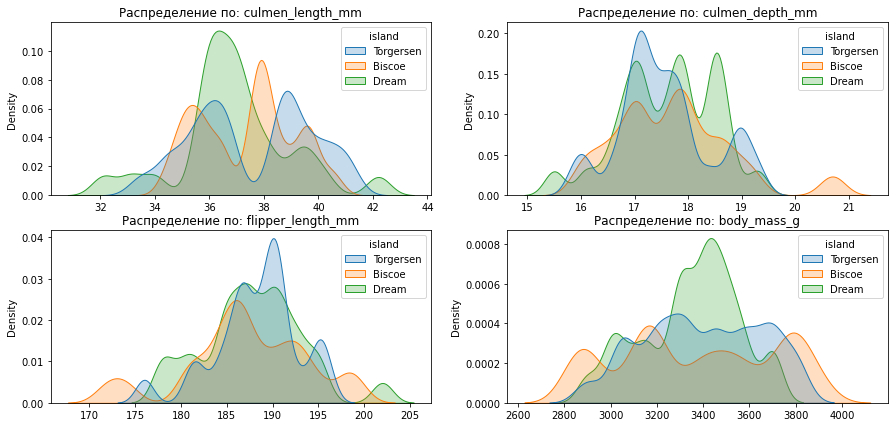

In [286]:
fig, axes = plt.subplots(2, 2, figsize=(15, 7))
axes = axes.ravel() 
cols = df_ad_f.columns[2:6]  

for col, ax in zip(cols, axes):
    data = df_ad_f[[col, 'island']] 
    sns.kdeplot(data=data, x=col, hue='island', shade=True, bw_adjust=0.4, ax=ax)
    ax.set(title=f'Распределение по: {col}', xlabel=None)
    
plt.show()

Интересно, что по части длины и толщины клювов, а также длине плавника у самцов Адели, выделяется остров Torgrensen. У самок же наоборот основной "вклад" вносит остров Dream.

In [287]:
print("Ассиметрия FEMALE: ", df_ad_f.skew(axis = 0), sep='\n')
print("Ассиметрия MALE: ", df_ad_m.skew(axis = 0), sep='\n')

Ассиметрия FEMALE: 
culmen_length_mm     0.028446
culmen_depth_mm      0.368035
flipper_length_mm   -0.304679
body_mass_g         -0.065212
dtype: float64
Ассиметрия MALE: 
culmen_length_mm    -0.041884
culmen_depth_mm      0.423133
flipper_length_mm    0.035347
body_mass_g         -0.083754
dtype: float64


C:\Users\db2001\AppData\Local\Temp/ipykernel_7536/2637192157.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("Ассиметрия FEMALE: ", df_ad_f.skew(axis = 0), sep='\n')
C:\Users\db2001\AppData\Local\Temp/ipykernel_7536/2637192157.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("Ассиметрия MALE: ", df_ad_m.skew(axis = 0), sep='\n')


##### Тест Шапиро-Уилка

Тест Шапиро – Уилка, широко известный непараметрический тест для оценки отклонения наблюдений от кривой нормального распределения. Нулевая гипотеза для этого теста заключается в том, что данные распределены нормально. Если выбран установлен уровень значимости α = 0.05, а значение p меньше 0.05, тогда нулевая гипотеза о нормальном распределении данных отклоняется. Если значение p больше 0.05, нулевая гипотеза не отклоняется.

In [288]:
def s_u(var):
    stats.shapiro(var)
    print(stats.shapiro(var))

In [305]:
print("Вес тела")
s_u(df_ad_m.query('island == "Torgersen"')['body_mass_g'])
s_u(df_ad_m.query('island == "Biscoe"')['body_mass_g'])                                                         
s_u(df_ad_m.query('island == "Dream"')['body_mass_g'])
print("Толщина клюва")
s_u(df_ad_m.query('island == "Torgersen"')['culmen_depth_mm'])
s_u(df_ad_m.query('island == "Biscoe"')['culmen_depth_mm'])
s_u(df_ad_m.query('island == "Dream"')['culmen_depth_mm'])
print("Длина клюва")
s_u(df_ad_m.query('island == "Torgersen"')['culmen_length_mm'])
s_u(df_ad_m.query('island == "Biscoe"')['culmen_length_mm'])
s_u(df_ad_m.query('island == "Dream"')['culmen_length_mm'])
print("Длина плавника")
s_u(df_ad_m.query('island == "Torgersen"')['flipper_length_mm'])
s_u(df_ad_m.query('island == "Biscoe"')['flipper_length_mm'])
s_u(df_ad_m.query('island == "Dream"')['flipper_length_mm'])

Вес тела
ShapiroResult(statistic=0.9753059148788452, pvalue=0.7446821928024292)
ShapiroResult(statistic=0.9482852816581726, pvalue=0.2919425666332245)
ShapiroResult(statistic=0.9720558524131775, pvalue=0.616639256477356)
Толщина клюва
ShapiroResult(statistic=0.9726811051368713, pvalue=0.673770010471344)
ShapiroResult(statistic=0.9740856289863586, pvalue=0.8032559752464294)
ShapiroResult(statistic=0.9557007551193237, pvalue=0.2565405070781708)
Длина клюва
ShapiroResult(statistic=0.9746562242507935, pvalue=0.727245569229126)
ShapiroResult(statistic=0.9482126235961914, pvalue=0.290965735912323)
ShapiroResult(statistic=0.9803000688552856, pvalue=0.845662534236908)
Длина плавника
ShapiroResult(statistic=0.952397346496582, pvalue=0.24498683214187622)
ShapiroResult(statistic=0.9654120802879333, pvalue=0.6056117415428162)
ShapiroResult(statistic=0.9804034233093262, pvalue=0.8482261300086975)


В нашем случае получается, что данные распределены нормально. Значит можно провести тест на однородность дисперсии. Для этого воспользуемся **критерием Бартлетта**.

##### Критерий Бартлетта

Тест Бартлетта на однородность дисперсий - это тест, очень похожий на тест Левена, который измеряет, одинаковы ли дисперсии для наших выборок. Нулевой гипотезой считается, что все выборочные данные имеют одинаковые отклонения.

In [320]:
# Вес пингвина
from scipy.stats import bartlett

bmt = df_ad_m.query('island == "Torgersen"')['body_mass_g']
bmb = df_ad_m.query('island == "Biscoe"')['body_mass_g']
bmd = df_ad_m.query('island == "Dream"')['body_mass_g']

stat, p = bartlett(bmt, bmb, bmd)

print(stat, p)

0.21747310400397724 0.8969666904529331


In [309]:
# Длина клюва

clt = df_ad_m.query('island == "Torgersen"')['culmen_length_mm']
clb = df_ad_m.query('island == "Biscoe"')['culmen_length_mm']
cld = df_ad_m.query('island == "Dream"')['culmen_length_mm']

stat, p = bartlett(clt, clb, cld)

print(stat, p)

9.715267060205969 0.007768846897133149


In [321]:
# Длина плавника

flt = df_ad_m.query('island == "Torgersen"')['flipper_length_mm']
flb = df_ad_m.query('island == "Biscoe"')['flipper_length_mm']
fld = df_ad_m.query('island == "Dream"')['flipper_length_mm']

stat, p = bartlett(flt, flb, fld)

print(stat, p)

0.3477707662919958 0.8403932153649796


In [322]:
# Толщина клюва

cdt = df_ad_m.query('island == "Torgersen"')['culmen_depth_mm']
cdb = df_ad_m.query('island == "Biscoe"')['culmen_depth_mm']
cdd = df_ad_m.query('island == "Dream"')['culmen_depth_mm']

stat, p = bartlett(cdt, cdb, cdd)

print(stat, p)

2.0888107358717125 0.35190100879977104


По результатам применения критерия Бартлетта у нас возникла небольшая проблема - мы обнаружили разницу между отклонениями длин клювов наших пингвинов (p-value = 0.00776 < 0.05 = α). Таким образом, нулевая гипотеза отбрасывается, а предположение о равных дисперсиях нарушается, что вынуждает нам прибегнуть к **критерию Краскела-Уоллиса**. 

Критерий Краскела-Уоллиса используется для определения, существует ли статистически значимая разница между медианами трех или более независимых групп. Этот критерий является непараметрическим эквивалентом одностороннего ANOVA и обычно используется, когда нарушается предположение о нормальности.

Нулевой гипотезой критерия выступает тезис о том, что медианы выборок равны. Альтернативная гипотеза утверждает обратное.

In [325]:
from scipy import stats

print('Длина клюва')
stats.kruskal(clt, clb, cld)

Длина клюва


KruskalResult(statistic=1.1089086752270954, pvalue=0.5743855963162967)

In [326]:
print('Длина плавников')
stats.kruskal(flt, flb, fld)

Длина плавников


KruskalResult(statistic=3.875799526251505, pvalue=0.1440060792726965)

In [327]:
print('Толщина клюва')
stats.kruskal(cdt, cdb, cdd)

Толщина клюва


KruskalResult(statistic=1.8190392204521815, pvalue=0.40271763900818086)

In [328]:
print('Вес пингвина')
stats.kruskal(bmt, bmb, bmd)

Вес пингвина


KruskalResult(statistic=0.3334337044881496, pvalue=0.8464392447824383)

Получается, что **статистически значимой разницы** между медианными размерами частей тела пингвинов Адели, обусловленной географическим положением, **нет**.

#### TWO-WAY ANOVA

Используя двусторонний дисперсионный анализ выясним:
- Как географическое положение влияет на длину клюва;
- Как длина плавника влияет на длину клюва;
- Как совместно плавник и остров обитания пингвина влияет на длину клюва.

In [343]:
ddd = df_ad_m.drop(columns='culmen_depth_mm')
ddd.isna().sum()

species              0
island               0
culmen_length_mm     0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [351]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('culmen_length_mm ~ C(island) + C(flipper_length_mm) + C(island):C(flipper_length_mm)', data=ddd).fit()
anova_table = sm.stats.anova_lm(model, typ=3)
anova_table

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 56, but rank is 35
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
Intercept,6670.493178,1.0,1917.182462,1.289808e-26
C(island),2.408227,2.0,0.346077,7.105503e-01
C(flipper_length_mm),248.262685,28.0,2.548349,8.665995e-03
C(island):C(flipper_length_mm),311.246342,56.0,1.597430,1.058764e-01
Residual,93.941667,27.0,NaN,NaN


Статистически значимое влияние на длину клюва оказывает длина плавника пингвина (p-value = 0.00866 < 0.05 = α). Остальные показатели не позволяют отбросить нулевую гипотезу.

In [353]:
from bioinfokit.analys import stat

res = stat()
res.tukey_hsd(df=ddd,
              res_var='culmen_length_mm',
              xfac_var='island',
              anova_model='culmen_length_mm ~ C(island) + C(flipper_length_mm) + C(island):C(flipper_length_mm)')
res.tukey_summary

D:\Anaconda\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 0
  warnings.warn('covariance of constraints does not have full '
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:1900: RuntimeWarning: invalid value encountered in true_divide
  F /= J
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 28, but rank is 9
  warnings.warn('covariance of constraints does not have full '
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:1871: V

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Torgersen,Biscoe,0.398316,-0.929752,1.726385,1.051456,0.725824
1,Torgersen,Dream,0.209834,-1.026765,1.446433,0.594881,0.900000
2,Biscoe,Dream,0.608150,-0.699195,1.915496,1.630813,0.491937
